# rought outline of workflow

1. Get data ready (turn into tensors)
2. Build or pick a pretrained model
2.1. Pick a loss function & optimiser
2.2. Build a training loop
3. Fit the model to the data
4. Evaluae teh mode;
5. Improve the model
6. Save and reload the model



In [25]:
import tinygrad
import matplotlib.pyplot as plt
from tinygrad.tensor import Tensor
from tinygrad.nn.optim import SGD
from extra.training import train, sparse_categorical_crossentropy
import numpy


## 1. Data (preparing and loading)

### example with known paramater

In [26]:
weight = 0.7
bias = 0.3


X = Tensor.arange(start=0, stop=1, step=0.02).unsqueeze(dim=1)
y = weight * X +bias
numpy.set_printoptions(precision=4,floatmode="fixed")
#print(X[:20].numpy())
#print(X[:20].numpy().dtype)

## Split data into trainnig and test sets

In [27]:
training_split = int(.8 * len(X.numpy()))
training_split
X_train, y_train = X[:training_split],y[:training_split]
X_test, y_test = X[training_split:],y[training_split:]
#print(X_test.numpy())

In [28]:
#len(X_train.numpy()), len(y_train.numpy()), len(X_test.numpy()), len(y_test.numpy())

# matplotlib

In [29]:
def plot_predictions(train_data=X_train.numpy(), 
                     train_labels=y_train.numpy(), 
                     test_data=X_test.numpy(),
                     test_labels=y_test.numpy(),
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions.numpy(), c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size":14});

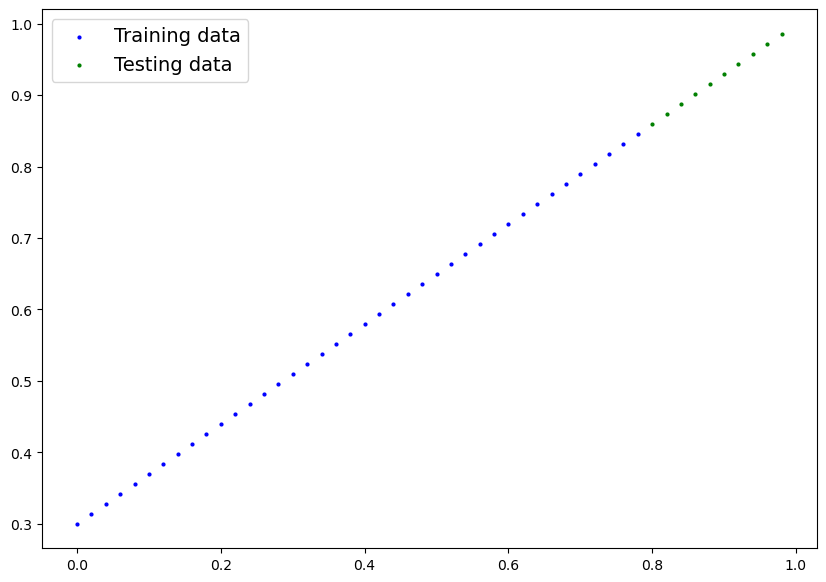

In [30]:
plot_predictions();

# linear regression model

In [31]:
class LinearRegressionModel:
    def __init__(self, input_size):
        self.weights = Tensor.randn(input_size).reshape(1,-1)
        self.bias = Tensor.randn(input_size )
        
    def forward(self, x):
        return self.weights * x + self.bias
    

###  Cheat Sheet
https://pytorch.org/tutorials/beginner/ptcheat.html


In [32]:
#numpy.random.seed(42)
Tensor.manual_seed(42)

model_0 = LinearRegressionModel(input_size=1)

print(model_0.weights.numpy())
print(model_0.bias.numpy())

[[0.1419]]
[-1.6685]


In [33]:
Tensor.randn(5).numpy()

array([-1.3321,  0.5826,  0.3740,  1.7554,  0.1396], dtype=float32)

In [34]:
X = numpy.random.randn(100, 1).astype(numpy.float32)
#print(model_0.weights.shape)


#X_test_tensor = Tensor(X).reshape(1,-1)
X_test_tensor = X_test
#print(X_test_tensor[1].shape)
#print(X_test_tensor[0].numpy())
#print(X_test_tensor[1].numpy())
#print(X_test_tensor.numpy())
#model_0.weights.dot(X_test_tensor[0])
#print(X_test_tensor.shape)
print(X_test.shape)

(10, 1)


In [35]:
#print(X_test)
#print(model_0.weights.shape)

In [86]:
optimiser = SGD([model_0.weights, model_0.bias], lr = 0.01)
for value in X_test:
    #print(value)
    y_preds = model_0.forward(value)
    
y_predictions = model_0.forward(X_test)

In [87]:
print(y_preds.numpy())
print(y_predictions.numpy())

[[0.9787]]
[[0.8525]
 [0.8666]
 [0.8806]
 [0.8946]
 [0.9086]
 [0.9226]
 [0.9366]
 [0.9506]
 [0.9647]
 [0.9787]]


/home/mahir/.local/lib/python3.11/site-packages/pyopencl/__init__.py:270: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


In [88]:
#print(X_test.numpy())

In [89]:
#print(y_test.numpy())

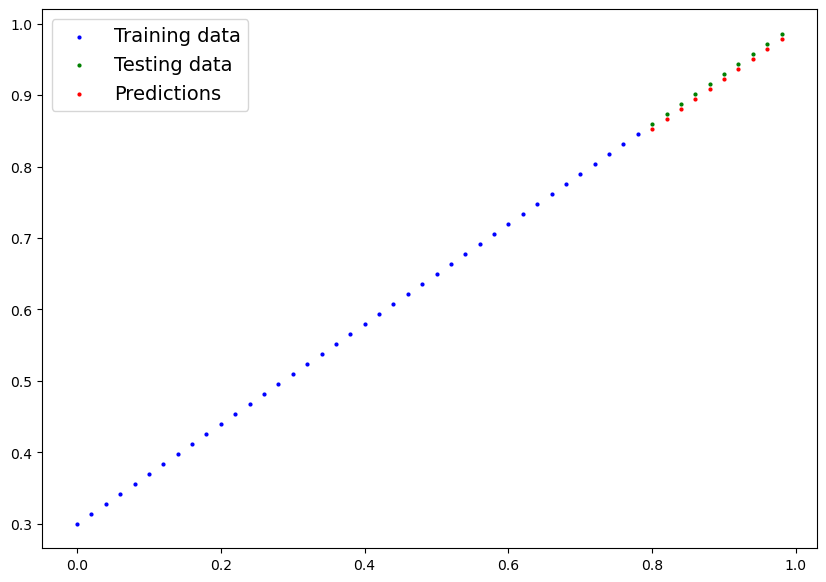

In [90]:
plot_predictions(predictions=y_predictions)

## 3 train model


one way to measure model predictions is using a loss function

this we need to train
**Loss Function**:
**Optimiser**:

We Need
- Training Loop
- Testing Loop


In [41]:
print(model_0.weights)

print(model_0.bias)


<Tensor const<0.14190717041492462, dtypes.float> with grad None>
<Tensor const<-1.6685079336166382, dtypes.float> with grad None>


## Setup Loss function
MAE_loss = Tensor.mean(Tensor.abs(y_pred-y_test))


In [42]:
def MAE_loss(y_pred, y_true):
    return Tensor.mean(Tensor.abs(y_pred.sub(y_true)))
    

In [43]:
from tinygrad.nn.optim import *

In [44]:
get_parameters(model_0)

[<Tensor const<0.14190717041492462, dtypes.float> with grad None>,
 <Tensor const<-1.6685079336166382, dtypes.float> with grad None>]

In [82]:
optim = SGD(get_parameters(model_0), lr=0.001)

## Building A training loop in tingrad

0. loop through data
1. forward pass
2. calculate loss
3. optimiser zero grad
4. loss backward (backpropogation)
5. Optimiser step


In [83]:
print(y_train.shape)
y_pred = model_0.forward(X_train)
print(y_pred.shape)
print(y_pred)
print((y_pred-y_train))
print(X_train.shape)

(40, 1)
(40, 1)
<Tensor <LB (40, 1) dtypes.float op:BinaryOps.ADD st:ShapeTracker(shape=(40, 1), views=[View((40, 1), (1, 0), 0, None)])> with grad None>
<Tensor <LB (40, 1) dtypes.float op:BinaryOps.SUB st:ShapeTracker(shape=(40, 1), views=[View((40, 1), (1, 0), 0, None)])> with grad None>
(40, 1)


In [84]:
# epoch is one loop through data
epochs = 1000


# 0. loop through data

for epoch in range(epochs):
    # set model to training mode
    #Tensor.training = True
    
    #loss.requires_grad = True
    #1. forward pass
    y_pred = model_0.forward(X_train)
    
    #2. calculate loss
    loss = MAE_loss(y_pred, y_train)
    
    #3. optimiser zero grad
    optim.zero_grad()
    
    #4. perforam backpropagtion
    loss.backward()
    #if noloss: del loss
    
    #5. perform gradient descent
    optimiser.step()
    
    # turn off gradient tracking
    
    
print(model_0.weights.numpy())
print(model_0.bias.numpy())


[[0.7007]]
[0.2920]


In [56]:
print(get_parameters(model_0))
print(get_parameters(loss))

[<Tensor buffer<1, dtypes.float> with grad <LB (1, 1) dtypes.float op:buffer<1, dtypes.float> st:ShapeTracker(shape=(1, 1), views=[View((1, 1), (0, 0), 0, None)])>>, <Tensor buffer<1, dtypes.float> with grad <LB (1,) dtypes.float op:buffer<1, dtypes.float> st:ShapeTracker(shape=(1,), views=[View((1,), (0,), 0, None)])>>]
[<Tensor <LB (1,) dtypes.float op:BinaryOps.MUL st:ShapeTracker(shape=(1,), views=[View((1,), (0,), 0, None)])> with grad <LB (1,) dtypes.float op:const<1.0, dtypes.float> st:ShapeTracker(shape=(1,), views=[View((1,), (0,), 0, None)])>>]
